# Registro Sismico en Bolivia entre 1920 - 2024

<center>
    <img src="https://gitlab.com/ramisohj/data-science/-/raw/main/data/maps/bolivian-map.jpg?inline=false" alt="drawing" width="400"/>
</center>

## Description
Coleccion de datos acerca de los terremotos registrados entre los años 1920 y 2024.

## Source
* https://www.usgs.gov/
* https://earthquake.usgs.gov/earthquakes/search/

| Column | Data Type | Typical Values | Variable | Description |
| ----- | ----- | ----- | ----- | ----- |
| time | Date |  1970-01-01T00:00:00.000Z | CUANTITATIVA | Hora en la que se produjo el evento. |
| latitude | Decimal | [-90.0, 90.0] | CUANTITATIVA | Grados decimales de latitud. Valores negativos para latitudes meridionales. |
| longitude | Decimal | [-180.0, 180.0] | CUANTITATIVA | Grados decimales de longitud. Valores negativos para longitudes occidentales. |
| depth | Decimal | [0, 1000] | CUANTITATIVA | Profundidad del evento en kilómetros. |
| mag | Decimal | [-1.0, 10.0] | CUANTITATIVA | La magnitud del evento. |
| magType | String | [Md, Ml, Ms, Mw, Me, Mi, Mb, MLg] | CUALITATIVA | El método o algoritmo utilizado para calcular la magnitud preferida para el evento. |
| nst | Integer | | CUANTITATIVA | El número total de estaciones sísmicas utilizadas para determinar la ubicación del terremoto. |
| gap | Decimal | [0.0, 180.0] | CUANTITATIVA | La mayor brecha azimutal entre estaciones azimutalmente adyacentes (en grados). |
| dmin | Decimal | [0.4, 7.1] | CUANTITATIVA | Distancia horizontal desde el epicentro hasta la estación más cercana (en grados). 1 grado equivale aproximadamente a 111,2 kilómetros. |
| rms | Decimal | [0.13,1.39] | CUANTITATIVA | El tiempo de viaje residual de la media cuadrática (RMS), en segundos, utilizando todos los pesos. Este parámetro proporciona una medida del ajuste de los tiempos de llegada observados con los tiempos de llegada previstos para esta ubicación. |
| net | String | [ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw] | CUALITATIVA | Identificador del colaborador de datos. Identifica la red considerada como la fuente preferida de información para este evento. |
| id | String | usp00000aa | CUALITATIVA | Un identificador único para el evento. Este es el identificador preferido actual para el evento y puede cambiar con el tiempo. |
| updated | Date | 1970-01-01T00:00:00.000Z | CUANTITATIVA | Hora en que se actualizó el evento por última vez. |
| place | String | | CUALITATIVA | Descripción textual de la región geográfica mencionada cerca del evento. |
| type | String | [earthquake, quarry] | CUALITATIVA | Tipo de evento sísmico. |
| horizontalError | Decimal | [0, 100] | CUANTITATIVA | Incertidumbre de la ubicación reportada del evento en kilómetros. |
| depthError | Decimal | [0, 100] | CUANTITATIVA | Incertidumbre de la profundidad reportada del evento en kilómetros. |
| magError | Decimal | [0, 100] | CUANTITATIVA | Incertidumbre de la magnitud informada del evento. Error estándar estimado de la magnitud. |
| magNst | Integer | | CUANTITATIVA | El número total de estaciones sísmicas utilizadas para calcular la magnitud de este terremoto. |
| status | String | [automatic, reviewed, deleted] | CUALITATIVA | Indica si el evento ha sido revisado por un humano. |
| locationSource | String | [ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw] | CUALITATIVA | La red que originalmente fue autora de la ubicación reportada de este evento. |
| magSource | String | [ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw] | CUALITATIVA | Red que originalmente fue autora de la magnitud reportada para este evento. |ada para este evento. ||
|

In [1179]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Lectura y tratamiento de datos

In [1201]:
########################################################################################################
## readind the CSV file
url = 'https://gitlab.com/ramisohj/data-science/-/raw/main/data/earthquake/earthquakes_bolivia_1920-2024.csv?inline=false'
data = pd.read_csv(url)
data.shape
data.info()
########################################################################################################
## getting data from object
df = pd.to_datetime(data['time'])
data['time'] = (pd.to_datetime(data['time']))
########################################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1601 non-null   object 
 1   latitude         1601 non-null   float64
 2   longitude        1601 non-null   float64
 3   depth            1601 non-null   float64
 4   mag              1601 non-null   float64
 5   magType          1601 non-null   object 
 6   nst              634 non-null    float64
 7   gap              929 non-null    float64
 8   dmin             530 non-null    float64
 9   rms              1478 non-null   float64
 10  net              1601 non-null   object 
 11  id               1601 non-null   object 
 12  updated          1601 non-null   object 
 13  place            1601 non-null   object 
 14  type             1601 non-null   object 
 15  horizontalError  491 non-null    float64
 16  depthError       1255 non-null   float64
 17  magError      

### Analizar 2 variables y determine sus estadisticos de tendencia central y dispersión.

             mag        freq
count  54.000000   54.000000
mean    5.260185   29.648148
std     1.217671   50.743959
min     3.000000    1.000000
25%     4.325000    1.000000
50%     5.370000    3.000000
75%     6.097500   28.750000
max     8.200000  187.000000
             depth         freq
count  1278.000000  1278.000000
mean    212.670261     1.252739
std     116.180147     1.744746
min       3.400000     1.000000
25%     152.200000     1.000000
50%     203.200000     1.000000
75%     242.642500     1.000000
max     650.000000    55.000000


Text(0, 0.5, 'Frecuencia (Frecuency)')

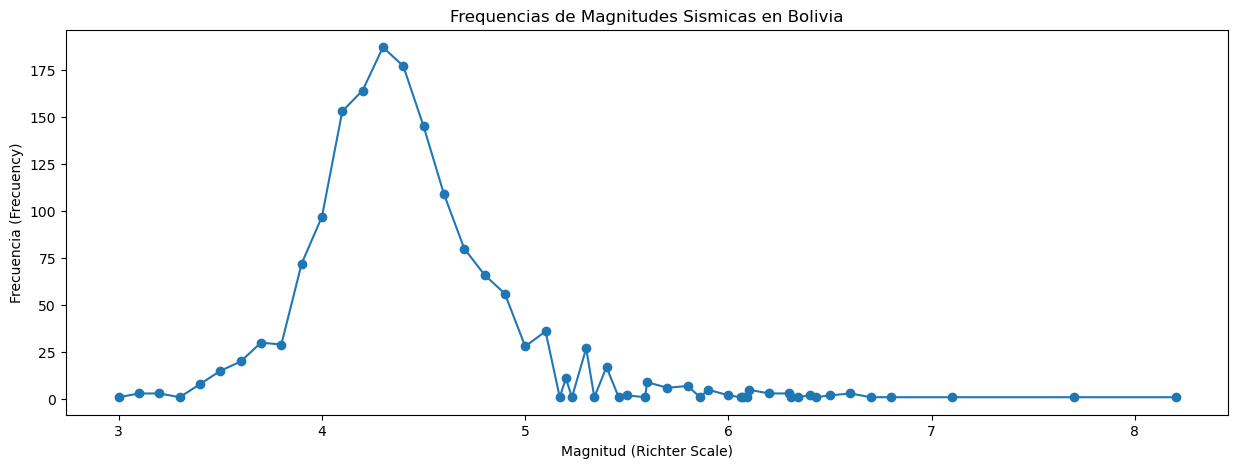

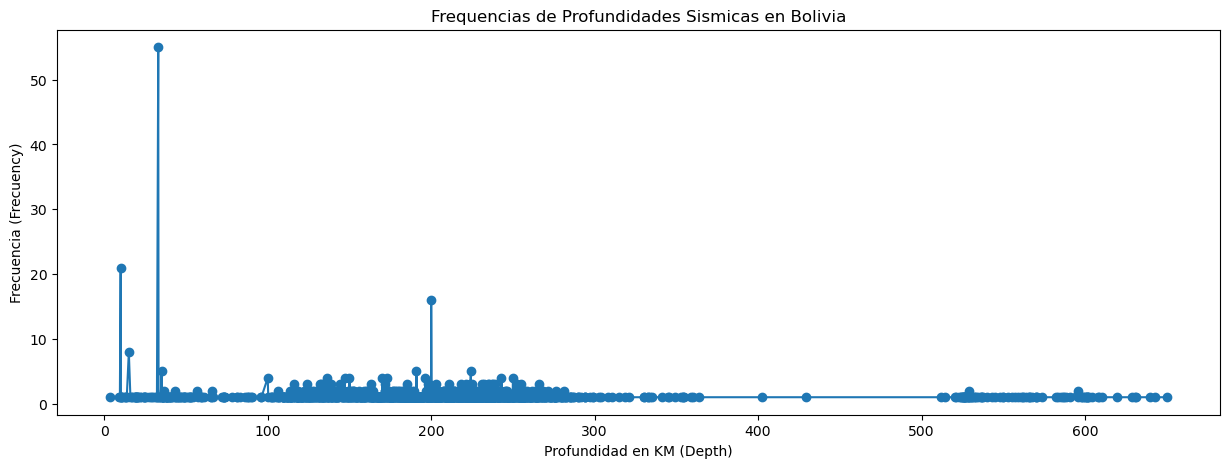

In [1274]:
########################################################################################################
## MAGNITUD Y FRECUENCIA
s_mag_freq = data['mag'].value_counts() # Series
df_mag_freq = pd.DataFrame({'mag':s_mag_freq.index, 'freq':s_mag_freq.values}) # new DataFrame
df_mag_freq = df_mag_freq.sort_values('mag')

print(df_mag_freq.describe())

fig = plt.figure(figsize=(15, 5))
plt.plot(df_mag_freq['mag'], df_mag_freq['freq'], '-o')
plt.title('Frequencias de Magnitudes Sismicas en Bolivia')
plt.xlabel('Magnitud (Richter Scale)')
plt.ylabel('Frecuencia (Frecuency)')
# plt.xlim(0, 10)
# plt.ylim(0, 200);
########################################################################################################
## PROFUNDIDAD Y FRECUENCIA
s_depth_freq = data['depth'].value_counts() # Series
df_depth_freq = pd.DataFrame({'depth':s_depth_freq.index, 'freq':s_depth_freq.values}) # new DataFrame
df_depth_freq = df_depth_freq.sort_values('depth')

print(df_depth_freq.describe())

fig = plt.figure(figsize=(15, 5))
plt.plot(df_depth_freq['depth'], df_depth_freq['freq'], '-o')
plt.title('Frequencias de Profundidades Sismicas en Bolivia')
plt.xlabel('Profundidad en KM (Depth)')
plt.ylabel('Frecuencia (Frecuency)')
# plt.xlim(0, 650)
# plt.ylim(0, 60);
########################################################################################################

### Elaborar 2 resumenes de datos con GROUP BY o PIVOT TABLE,  obtenga algunas conclusiones

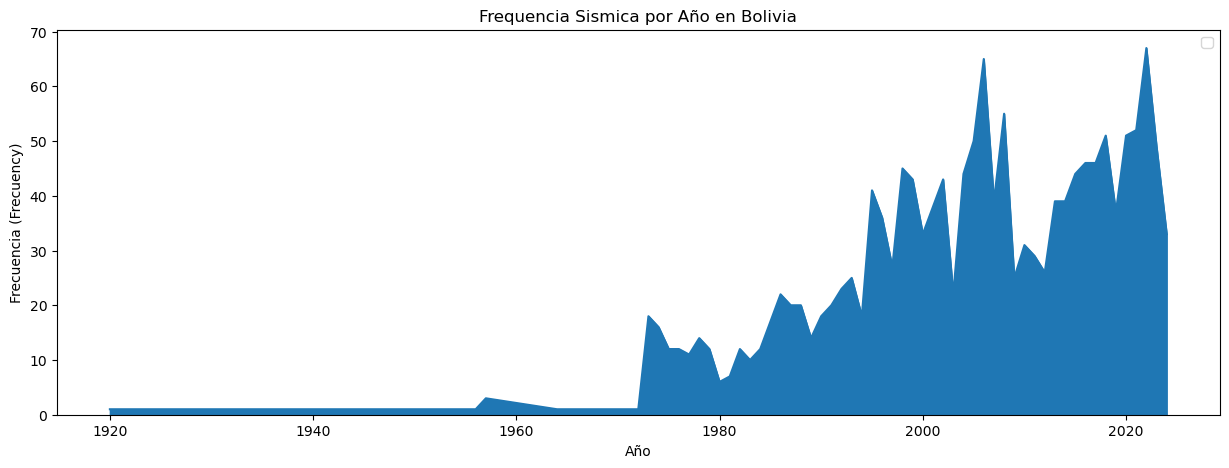

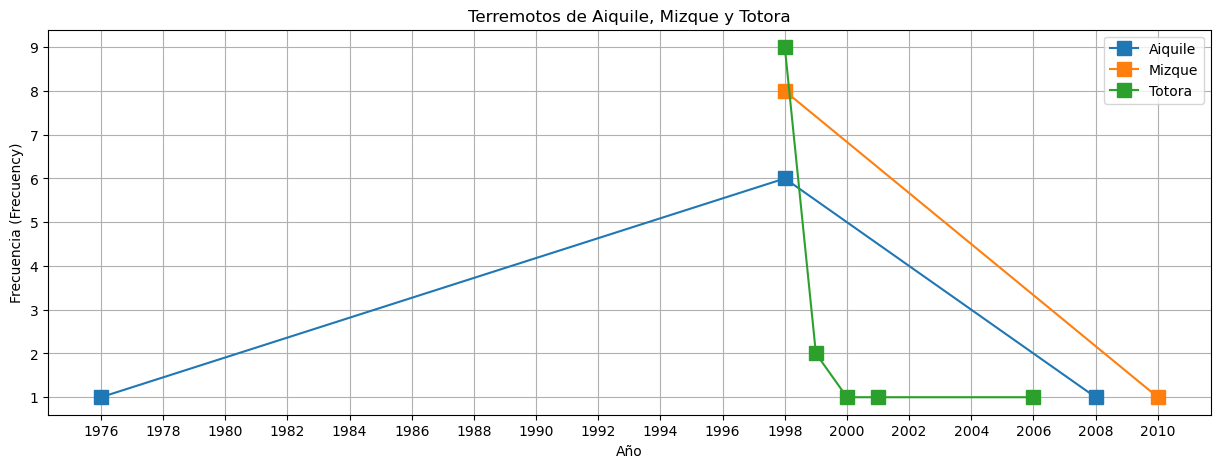

In [1228]:


########################################################################################################
## FRECUENCIA SISMICA POR AÑO

df_time_freq = data.groupby([data['time'].dt.year]).agg({'count'})['time']

df_time_freq.plot(kind='area', figsize=(15, 5))
plt.title('Frequencia Sismica por Año en Bolivia')
plt.xlabel('Año')
plt.legend([])
plt.ylabel('Frecuencia (Frecuency)')

########################################################################################################
## TERREMOTOS DE AIQUILE, MISQUE Y TOTORA

df_aiquile = data[data['place'].str.contains('aiquile', case=False)]
df_aiquile_freq = df_aiquile.groupby([df_aiquile['time'].dt.year]).agg({'count'})['time']

df_mizque = data[data['place'].str.contains('mizque', case=False)]
df_mizque_freq = df_mizque.groupby([df_mizque['time'].dt.year]).agg({'count'})['time']

df_totora = data[data['place'].str.contains('totora,', case=False)]
df_totora_freq = df_totora.groupby([df_totora['time'].dt.year]).agg({'count'})['time']


fig = plt.figure(figsize=(15, 5))
plt.xticks(np.arange(0,2024, 2))

for frame in [df_aiquile_freq, df_mizque_freq, df_totora_freq]:
    plt.plot(frame, '-s', markersize=10)
    


plt.legend(['Aiquile', 'Mizque', 'Totora'])
plt.title('Terremotos de Aiquile, Mizque y Totora')
plt.legend(['Aiquile', 'Mizque', 'Totora'])
plt.xlabel('Año')
plt.ylabel('Frecuencia (Frecuency)')
plt.grid(True)

########################################################################################################

### Elabora 4 Graficos que describan algunas variables, coloque una conclusión en cada gráfico

Text(0, 0.5, 'Magnitud (Richter Scale)')

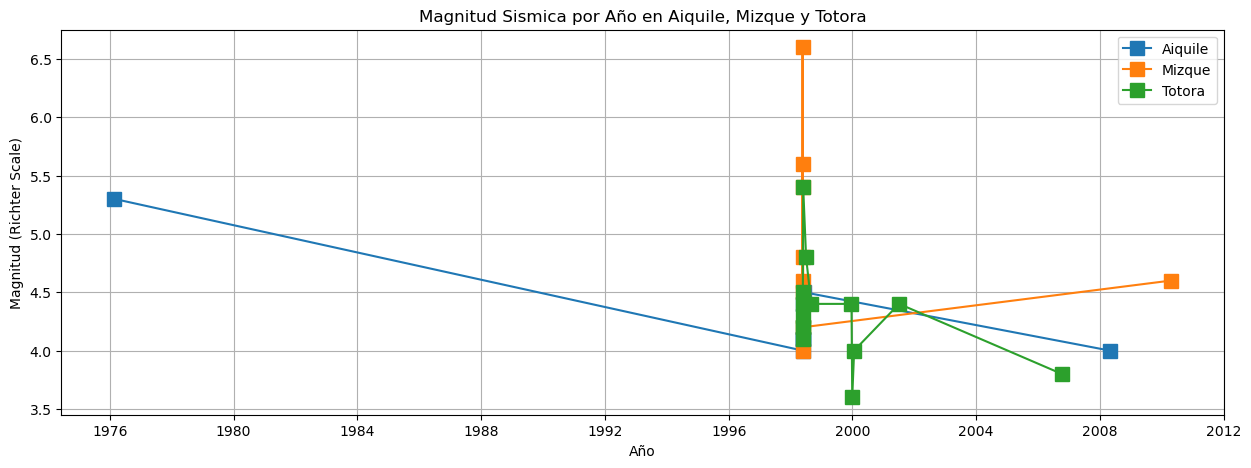

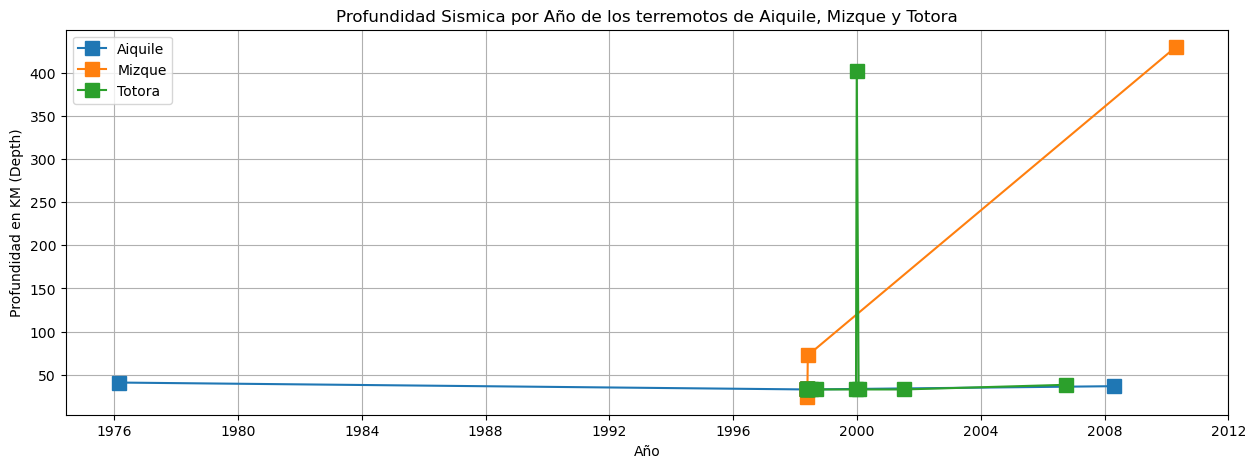

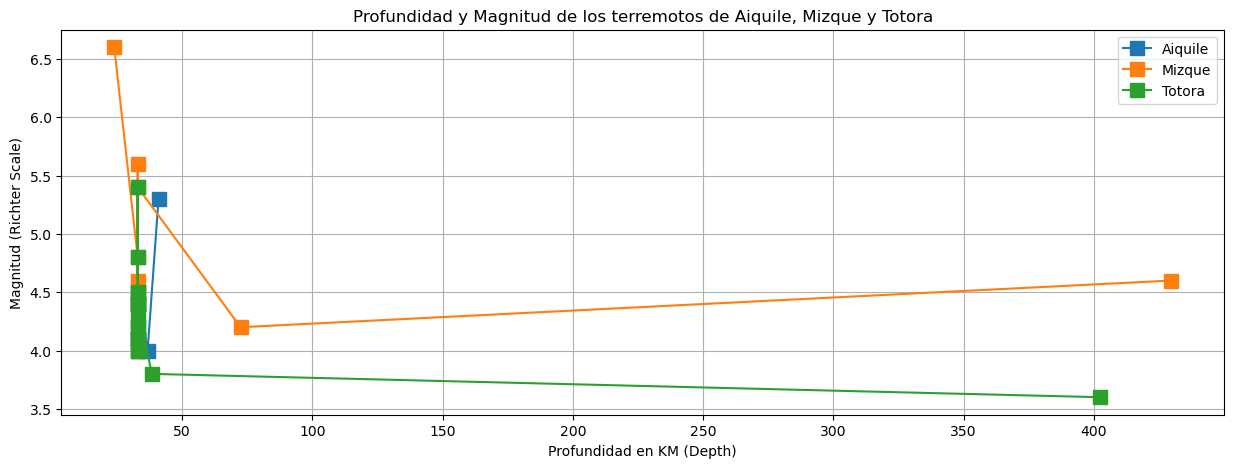

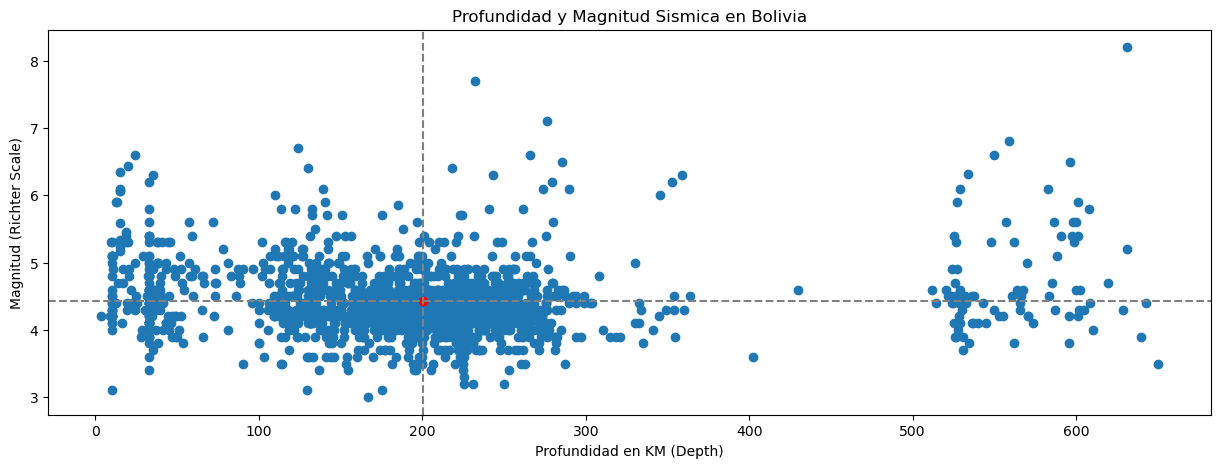

In [1278]:


########################################################################################################
## MAGNITUD SISMICA DE LOS TERRENOTOS DE AIQUILE, MISQUE Y TOTORA POR AÑO
## Aiquile
df_aiquile = data[data['place'].str.contains('aiquile', case=False)]
df_aiquile_mag = df_aiquile[['time', 'mag']]
## Mizque
df_mizque = data[data['place'].str.contains('mizque', case=False)]
df_mizque_mag = df_mizque[['time', 'mag']]
## Totora
df_totora = data[data['place'].str.contains('totora,', case=False)]
df_totora_mag = df_totora[['time', 'mag']]

fig = plt.figure(figsize=(15, 5))

plt.plot(df_aiquile_mag['time'], df_aiquile_mag['mag'], '-s', markersize=10)
plt.plot(df_mizque_mag['time'], df_mizque_mag['mag'], '-s', markersize=10)
plt.plot(df_totora_mag['time'], df_totora_mag['mag'], '-s', markersize=10)
plt.legend(['Aiquile', 'Mizque', 'Totora'])
plt.title('Magnitud Sismica por Año en Aiquile, Mizque y Totora')
plt.xlabel('Año')
plt.ylabel('Magnitud (Richter Scale)')
plt.grid(True)
########################################################################################################
## PROFUNDIDAD SISMICA DE LOS TERRENOTOS DE AIQUILE, MISQUE Y TOTORA POR AÑO
## Aiquile
df_aiquile_depth = df_aiquile[['time', 'depth']]
## Mizque
df_mizque_depth = df_mizque[['time', 'depth']]
## Totora
df_totora_depth = df_totora[['time', 'depth']]

fig = plt.figure(figsize=(15, 5))
plt.plot(df_aiquile_depth['time'], df_aiquile_depth['depth'], '-s', markersize=10)
plt.plot(df_mizque_depth['time'], df_mizque_depth['depth'], '-s', markersize=10)
plt.plot(df_totora_depth['time'], df_totora_depth['depth'], '-s', markersize=10)
plt.legend(['Aiquile', 'Mizque', 'Totora'])
plt.title('Profundidad Sismica por Año de los terremotos de Aiquile, Mizque y Totora')
plt.xlabel('Año')
plt.ylabel('Profundidad en KM (Depth)')
plt.grid(True)
########################################################################################################
## PROFUNDIDAD Y MAGNITUD DE TERREMOTOS DE AIQUILE, MISQUE Y TOTORA
## Aiquile
df_aiquile_depth_mag = df_aiquile[['depth', 'mag']].sort_values('depth')
# df_aiquile_depth_mag = df_aiquile_depth_mag.sort_values('depth')
# Mizque
df_mizque_depth_mag = df_mizque[['depth', 'mag']].sort_values('depth')
# df_mizque_depth_mag = df_mizque_depth_mag.sort_values('depth')
## Totora
df_totora_depth_mag = df_totora[['depth', 'mag']].sort_values('depth')
# df_totora_depth_mag = df_totora_depth_mag.sort_values('depth')

fig = plt.figure(figsize=(15, 5))
plt.plot(df_aiquile_depth_mag['depth'], df_aiquile_depth_mag['mag'], '-s', markersize=10)
plt.plot(df_mizque_depth_mag['depth'], df_mizque_depth_mag['mag'], '-s',  markersize=10)
plt.plot(df_totora_depth_mag['depth'], df_totora_depth_mag['mag'], '-s',  markersize=10)
plt.legend(['Aiquile', 'Mizque', 'Totora'])
plt.title('Profundidad y Magnitud de los terremotos de Aiquile, Mizque y Totora')
plt.xlabel('Profundidad en KM (Depth)')
plt.ylabel('Magnitud (Richter Scale)')
plt.grid(True)
########################################################################################################
## PROFUNDIDAD Y MAGNITUD DE TERREMOTOS EN BOLIVIA
df_bolivia_depth_mag = data[['depth', 'mag']].sort_values('depth')

# Calcular centro de masa
centro_masa_x = np.mean(df_bolivia_depth_mag['depth'])
centro_masa_y = np.mean(df_bolivia_depth_mag['mag'])

fig = plt.figure(figsize=(15, 5))

plt.scatter(df_bolivia_depth_mag['depth'], df_bolivia_depth_mag['mag'])
plt.scatter(centro_masa_x, centro_masa_y, color='red', label='Centro de masa')
plt.axvline(x=centro_masa_x, color='gray', linestyle='dashed')
plt.axhline(y=centro_masa_y, color='gray', linestyle='dashed')
plt.title('Profundidad y Magnitud Sismica en Bolivia')
plt.xlabel('Profundidad en KM (Depth)')
plt.ylabel('Magnitud (Richter Scale)')

